In [4]:
#IMPORTING LIBRARIES

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [57]:
x=[2,5,1,3,4,1,5,3,4,2]
y=[50,57,41,54,54,38,63,48,59,49]

In [58]:
tvCommerical = np.array(x)
storeSale = np.array(y)

In [59]:
tvCommerical

array([2, 5, 1, 3, 4, 1, 5, 3, 4, 2])

In [60]:
storeSale

array([50, 57, 41, 54, 54, 38, 63, 48, 59, 49])

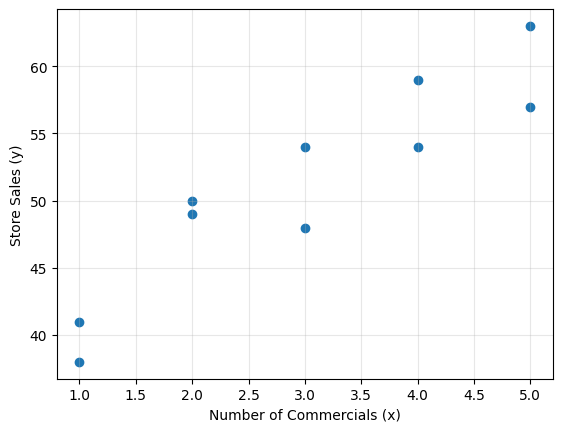

In [61]:
plt.scatter(tvCommerical, storeSale)
plt.grid(True, alpha=0.3)
plt.xlabel("Number of Commercials (x)")
plt.ylabel("Store Sales (y)")
plt.show()

In [62]:
correlation = np.corrcoef(x, y)[0, 1]
print(f"correlation coefficient: {correlation:.2f}")

correlation coefficient: 0.92


In [63]:
storeSale.shape

(10,)

In [64]:
meanStore = storeSale.mean()

In [65]:
meanStore

np.float64(51.3)

In [66]:
standDeviation = st.stdev(y)

In [67]:
standDeviation

7.775317071062475

In [68]:
varience =  st.variance(y)

In [69]:
varience

60.455555555555556

In [70]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [71]:
r_value

np.float64(0.9202734065508097)

In [72]:
#y = c + mx
yPred = intercept + slope*tvCommerical

In [73]:
yPred

array([46.5, 60.9, 41.7, 51.3, 56.1, 41.7, 60.9, 51.3, 56.1, 46.5])

In [74]:
linearRegModel = LinearRegression()
linearRegModel.fit(tvCommerical.reshape(-1, 1), storeSale)
yPredLinear = linearRegModel.predict(tvCommerical.reshape(-1, 1))


In [75]:
yPredLinear

array([46.5, 60.9, 41.7, 51.3, 56.1, 41.7, 60.9, 51.3, 56.1, 46.5])

In [76]:
print("R Value (Correlation Coefficient By Scipy) : ", round(r_value,2))
print("Correlation Coefficient: " ,round(correlation,2))
print("Linear Regression R2:", r2_score(y, yPred))
print("Intercept : ",round(intercept,2))
print("Slope : ",round(slope,2))
print("P Value : ",p_value)
print("Standard Error : ",round(std_err,2))

R Value (Correlation Coefficient By Scipy) :  0.92
Correlation Coefficient:  0.92
Linear Regression R2: 0.8469031428046316
Intercept :  36.9
Slope :  4.8
P Value :  0.00016040695410050903
Standard Error :  0.72


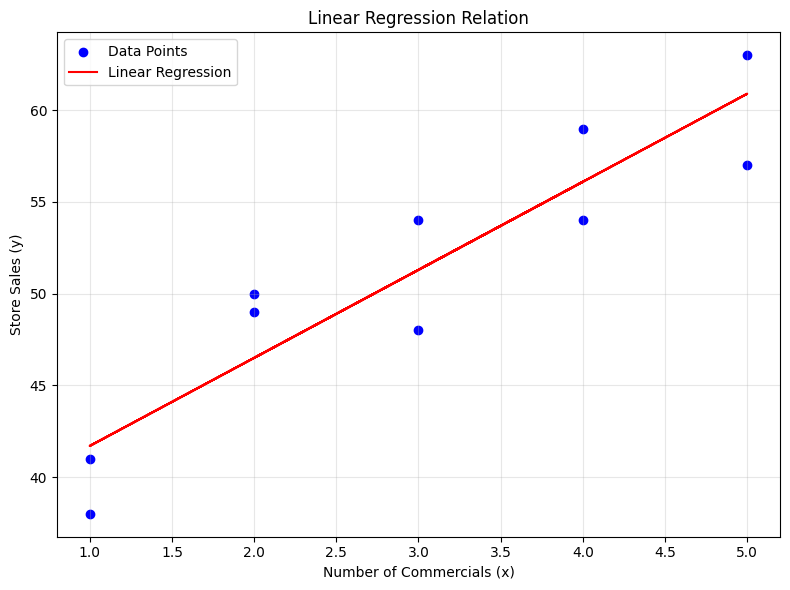

In [77]:

plt.figure(figsize=(8, 6))
plt.scatter(tvCommerical, storeSale, color='blue', label='Data Points')
plt.plot(tvCommerical, intercept + slope*tvCommerical, 'r', label='Linear Regression')
plt.title('Linear Regression Relation')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel("Number of Commercials (x)")
plt.ylabel("Store Sales (y)")
plt.tight_layout()
plt.show()

In [78]:
#NOW TASK 2

In [79]:
x1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [80]:
tvCommerical1 = np.array(x1)
storeSale1 = np.array(y1)

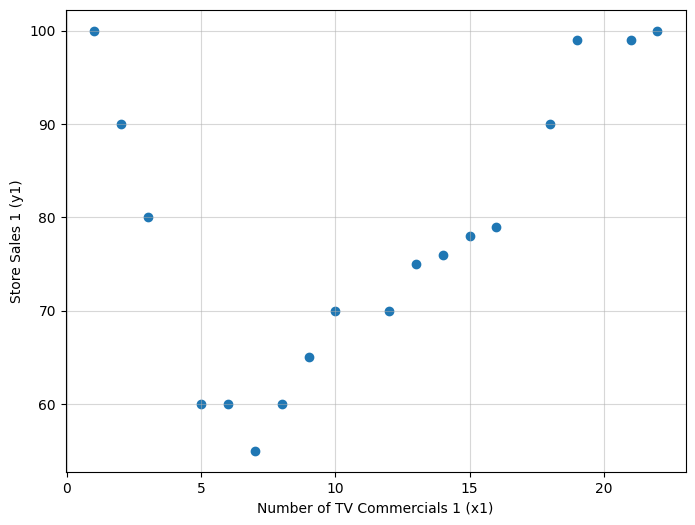

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(tvCommerical1, storeSale1)
plt.grid(True, alpha=0.5)
plt.xlabel("Number of TV Commercials 1 (x1)")
plt.ylabel("Store Sales 1 (y1)")
plt.show()

In [82]:
correlation1 = np.corrcoef(x1, y1)[0, 1]
print("Pearson correlation coefficient 1: ", round(correlation1,2))

Pearson correlation coefficient 1:  0.43


In [83]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)

In [84]:
print("R Value 1 :" , round(r_value1,2))

R Value 1 : 0.43


In [85]:
lrModel = LinearRegression()
lrModel.fit(tvCommerical1.reshape(-1, 1), storeSale1)

LinearRegression()

In [86]:
yPred1 = lrModel.predict(tvCommerical1.reshape(-1, 1))
r2Linear = r2_score(y1, yPred1)
mseLinear = mean_squared_error(y1, yPred1)

In [87]:
print("R2 Score (Linear Regression):", round(r2Linear,2))
print("Mean Squared Error (Linear Regression):", round(mseLinear,2))

R2 Score (Linear Regression): 0.18
Mean Squared Error (Linear Regression): 179.61


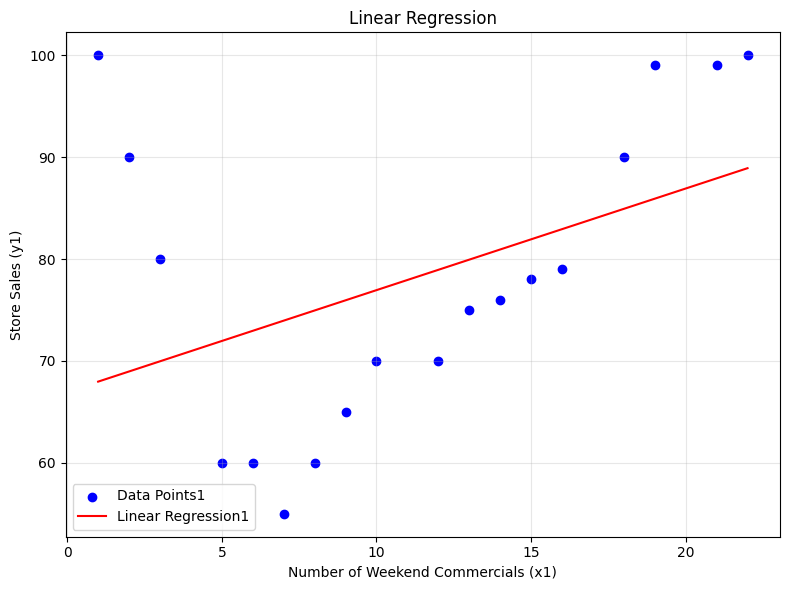

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(tvCommerical1, storeSale1, color='blue', label='Data Points1')
plt.plot(tvCommerical1, yPred1, 'r', label='Linear Regression1')
plt.title('Linear Regression')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel("Number of Weekend Commercials (x1)")
plt.ylabel("Store Sales (y1)")
plt.tight_layout()
plt.show()

In [89]:
# Polynomial Regression
polyFeature = PolynomialFeatures(degree=2)
polyX = polyFeature.fit_transform(tvCommerical1.reshape(-1, 1))
polyModel = LinearRegression()
polyModel.fit(polyX, storeSale1)
polyYPred = polyModel.predict(polyX)
r2Poly = r2_score(storeSale1, polyYPred)
msePoly = mean_squared_error(storeSale1, polyYPred)

In [90]:
print("R2 Score (Polynomial Regression):", round(r2Poly,2))
print("Mean Squared Error (Polynomial Regression):", round(msePoly,2))

R2 Score (Polynomial Regression): 0.76
Mean Squared Error (Polynomial Regression): 52.77


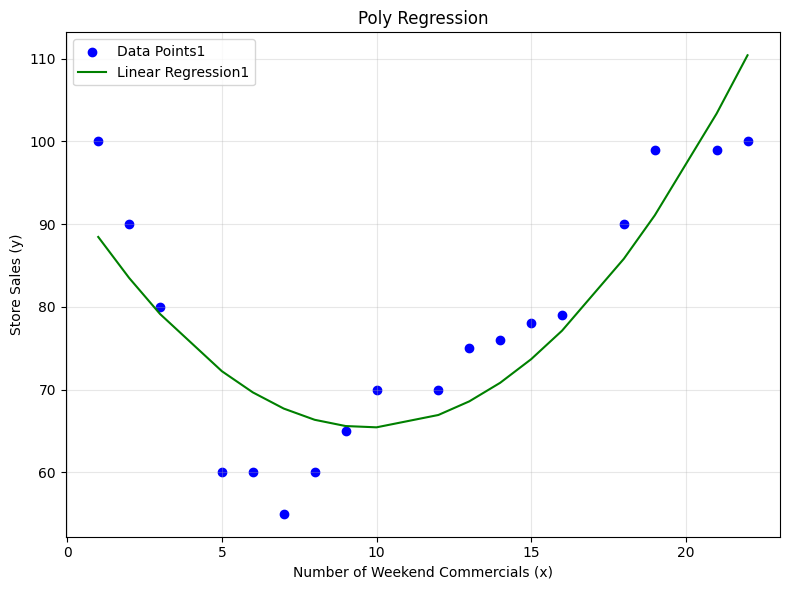

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(tvCommerical1, storeSale1, color='blue', label='Data Points1')
plt.plot(tvCommerical1, polyYPred, 'g', label='Linear Regression1')
plt.title('Poly Regression')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlabel("Number of Weekend Commercials (x)")
plt.ylabel("Store Sales (y)")
plt.tight_layout()
plt.show()

In [92]:
# Comparing Graph

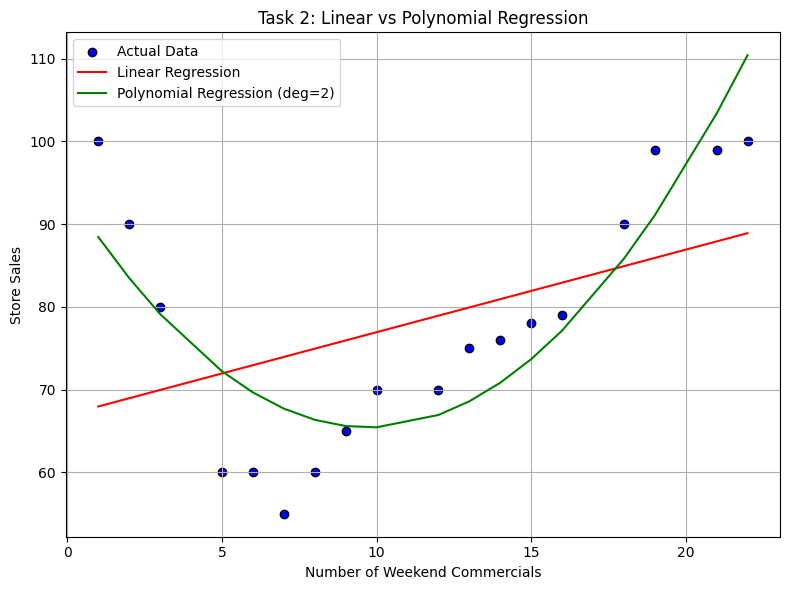

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(tvCommerical1, storeSale1, color='blue', label='Actual Data', edgecolor='k')
plt.plot(tvCommerical1, yPred1, label='Linear Regression', color='red')
plt.plot(tvCommerical1, polyYPred, label='Polynomial Regression (deg=2)', color='green')
plt.xlabel('Number of Weekend Commercials')
plt.ylabel('Store Sales')
plt.title('Task 2: Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
#Comparision Of Both
print("R2 Score (Linear Regression):", round(r2Linear,2))
print("Mean Squared Error (Linear Regression):", round(mseLinear,2))
print("R2 Score (Polynomial Regression):", round(r2Poly,2))
print("Mean Squared Error (Polynomial Regression):", round(msePoly,2))

R2 Score (Linear Regression): 0.18
Mean Squared Error (Linear Regression): 179.61
R2 Score (Polynomial Regression): 0.76
Mean Squared Error (Polynomial Regression): 52.77


In [95]:
#TASK - 03

In [125]:
df = pd.read_csv("breast-cancer.csv")

In [126]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [127]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [129]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
# Encode 'M' = 1, 'B' = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [131]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [140]:
features3D = ['radius_mean', 'texture_mean', 'smoothness_mean']
X = df[features3D].values
y = df['diagnosis'].values


In [141]:
X

array([[17.99   , 10.38   ,  0.1184 ],
       [20.57   , 17.77   ,  0.08474],
       [19.69   , 21.25   ,  0.1096 ],
       ...,
       [16.6    , 28.08   ,  0.08455],
       [20.6    , 29.33   ,  0.1178 ],
       [ 7.76   , 24.54   ,  0.05263]])

In [142]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

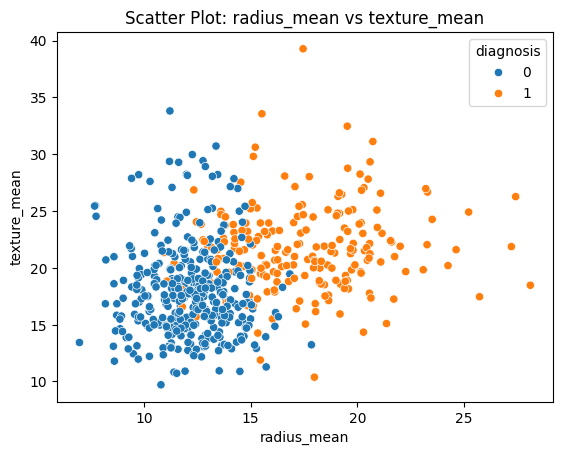

In [143]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df)
plt.title("Scatter Plot: radius_mean vs texture_mean")
plt.show()

In [144]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [149]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
ypredSVM = svc.predict(X_test)

In [150]:
print("Classification Report:")
print(classification_report(y_test, ypredSVM))

print("Confusion Matrix:")
print(confusion_matrix(y_test, ypredSVM))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[67  4]
 [ 2 41]]


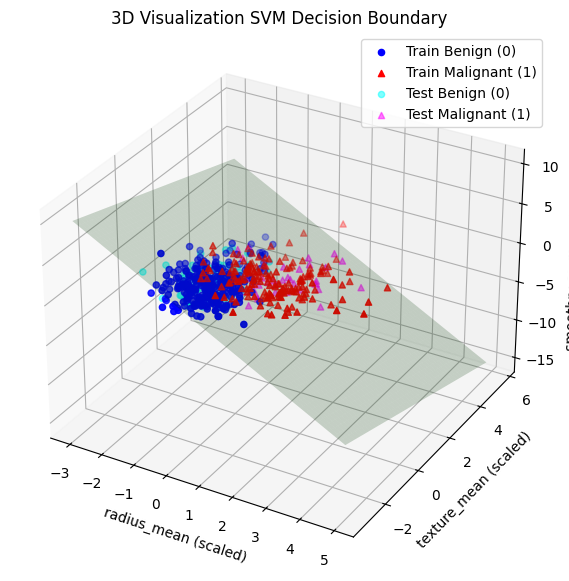

In [148]:
w = svc.coef_[0]
b = svc.intercept_[0]
z = lambda x, y: (-b - w[0]*x - w[1]*y) / w[2]

# Create grid to plot the plane
grid_x = np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 50)
grid_y = np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 50)
xx, yy = np.meshgrid(grid_x, grid_y)
zz = z(xx, yy)


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot training points
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], X_train[y_train==0, 2],
           c='blue', marker='o', label='Train Benign (0)')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], X_train[y_train==1, 2],
           c='red', marker='^', label='Train Malignant (1)')

# Plot test points (lighter color for clarity)
ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], X_test[y_test==0, 2],
           c='cyan', marker='o', label='Test Benign (0)', alpha=0.5)
ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], X_test[y_test==1, 2],
           c='magenta', marker='^', label='Test Malignant (1)', alpha=0.5)

# Plot decision boundary plane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.2)

# Labels and legend
ax.set_xlabel(features_3d[0] + " (scaled)")
ax.set_ylabel(features_3d[1] + " (scaled)")
ax.set_zlabel(features_3d[2] + " (scaled)")
ax.set_title("3D Visualization SVM Decision Boundary")
ax.legend()

plt.show()